In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [145]:
df = pd.read_csv('data/title_budgets_ratings_v2.csv', index_col = 0)

In [146]:
df = df.rename(columns = {'profit':'profit_multiple'})

In [147]:
df.head()

,id,release_date,movie,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,year,month,production_budget_2,domestic_gross_2,worldwide_gross_2,genres2,profit_multiple
0,1,2009-12-18,Avatar,tt1775309,Avatar,Abatâ,2011,93.0,Horror,6.1,43,2009,12,425000000,760507625,2776345279,['Horror'],5.532577
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,"Action,Adventure,Fantasy",6.6,447624,2011,5,410600000,241063875,1045663875,"['Action', 'Adventure', 'Fantasy']",1.546673
2,3,2019-06-07,Dark Phoenix,tt6565702,Dark Phoenix,Dark Phoenix,2019,113.0,"Action,Adventure,Sci-Fi",6.0,24451,2019,6,350000000,42762350,149762350,"['Action', 'Adventure', 'Sci-Fi']",-0.572108
3,4,2015-05-01,Avengers: Age of Ultron,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi",7.3,665594,2015,5,330600000,459005868,1403013963,"['Action', 'Adventure', 'Sci-Fi']",3.243841
4,7,2018-04-27,Avengers: Infinity War,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi",8.5,670926,2018,4,300000000,678815482,2048134200,"['Action', 'Adventure', 'Sci-Fi']",5.827114


In [148]:
df.shape

(2943, 18)

In [149]:
df.isna().sum()

id                       0
release_date             0
movie                    0
tconst                   0
primary_title            0
original_title           0
start_year               0
runtime_minutes        121
genres                   8
averagerating            0
numvotes                 0
year                     0
month                    0
production_budget_2      0
domestic_gross_2         0
worldwide_gross_2        0
genres2                  8
profit_multiple          0
dtype: int64

We won't drop columns that have NaNs in runtime_minutes because some big productions, such as Titanic, does not have a value either! 

In [150]:
df.loc[df['movie']== 'Titanic']

,id,release_date,movie,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,year,month,production_budget_2,domestic_gross_2,worldwide_gross_2,genres2,profit_multiple
32,43,1997-12-19,Titanic,tt2495766,Titanic,Titanic,2012,NaN,Adventure,6.2,20,1997,12,200000000,659363944,2208208395,['Adventure'],10.041042


Is profit correlated with reviews? Scatter plot of average rating and profit (box office - budget)/budget. This analysis will help guide us to go after good revi
Steps:
- drop the 282 productions where worldwide gross revenue is zero.
- drop the 7 productions where profit multiple is so high it doens't make sense (choose 30 as cutoff). Dropped 43 movies.
- This leaves us with 2618 movies for analysis. 
- make the scatterplot

In [151]:
df[df['worldwide_gross_2'] == 0]

,id,release_date,movie,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,year,month,production_budget_2,domestic_gross_2,worldwide_gross_2,genres2,profit_multiple
318,80,2017-12-13,Bright,tt5519340,Bright,Bright,2017,117.0,"Action,Crime,Fantasy",6.4,147834,2017,12,90000000,0,0,"['Action', 'Crime', 'Fantasy']",-1.0
519,52,2015-12-11,The Ridiculous 6,tt2479478,The Ridiculous 6,The Ridiculous 6,2015,119.0,"Comedy,Western",4.8,38694,2015,12,60000000,0,0,"['Comedy', 'Western']",-1.0
520,53,2019-11-08,Midway,tt2428672,Midway,Midway,2013,85.0,"Documentary,Family",7.3,43,2019,11,59500000,0,0,"['Documentary', 'Family']",-1.0
1035,30,2019-09-30,Unhinged,tt5940342,Unhinged,Unhinged,2017,93.0,Horror,4.2,512,2019,9,29000000,0,0,['Horror'],-1.0
1094,56,2015-04-24,The Face of an Angel,tt2967008,The Face of an Angel,The Face of an Angel,2014,101.0,"Crime,Drama",4.6,4211,2015,4,26000000,0,0,"['Crime', 'Drama']",-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2936,56,2013-01-04,All Superheroes Must Die,tt1836212,All Superheroes Must Die,All Superheroes Must Die,2011,78.0,"Sci-Fi,Thriller",4.0,1977,2013,1,20000,0,0,"['Sci-Fi', 'Thriller']",-1.0
2937,59,2011-11-25,The Ridges,tt1781935,The Ridges,The Ridges,2011,89.0,"Drama,Horror,Thriller",2.9,127,2011,11,17300,0,0,"['Drama', 'Horror', 'Thriller']",-1.0
2938,62,2014-12-31,Stories of Our Lives,tt3973612,Stories of Our Lives,Stories of Our Lives,2014,60.0,Drama,7.5,85,2014,12,15000,0,0,['Drama'],-1.0
2941,78,2018-12-31,Red 11,tt7837402,Red 11,Red 11,2019,77.0,"Horror,Sci-Fi,Thriller",5.6,43,2018,12,7000,0,0,"['Horror', 'Sci-Fi', 'Thriller']",-1.0


In [152]:
df = df[df['worldwide_gross_2']!=0]

In [153]:
df[df['profit_multiple']>30].shape

(43, 18)

In [154]:
df = df[df['profit_multiple']<= 30]

In [155]:
df.shape

(2618, 18)

In [156]:
# df[df['year'] >= 2015].shape

In [157]:
# df = df[df['year'] >= 2015]

In [158]:
# df[df['start_year'] != df['year']]

In [159]:
df.shape

(2618, 18)

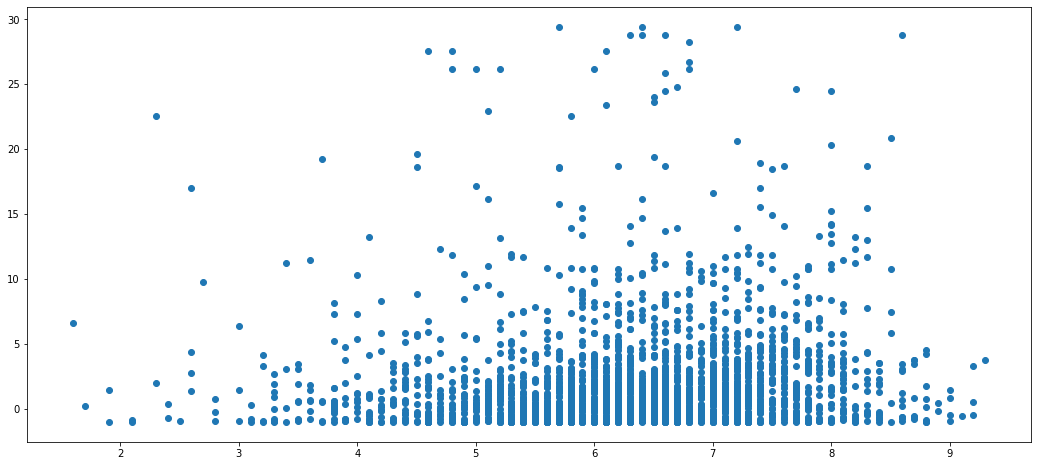

In [160]:
plt.figure(figsize = (18,8))
plt.scatter(df['averagerating'], df['profit_multiple'])
plt.show()

Revenue & profitability analysis by genre. 
Steps:
- Drop the 8 movies where genres are NaN. 
- This leaves us with 2610 movies for analysis. 
- Calculate the average revenue and profit multipe for all 22 genres represented. 

In [161]:
df['genres3'] = list(df['genres'].str.split(','))

In [162]:
df.head()

,id,release_date,movie,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,year,month,production_budget_2,domestic_gross_2,worldwide_gross_2,genres2,profit_multiple,genres3
0,1,2009-12-18,Avatar,tt1775309,Avatar,Abatâ,2011,93.0,Horror,6.1,43,2009,12,425000000,760507625,2776345279,['Horror'],5.532577,[Horror]
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,"Action,Adventure,Fantasy",6.6,447624,2011,5,410600000,241063875,1045663875,"['Action', 'Adventure', 'Fantasy']",1.546673,"[Action, Adventure, Fantasy]"
2,3,2019-06-07,Dark Phoenix,tt6565702,Dark Phoenix,Dark Phoenix,2019,113.0,"Action,Adventure,Sci-Fi",6.0,24451,2019,6,350000000,42762350,149762350,"['Action', 'Adventure', 'Sci-Fi']",-0.572108,"[Action, Adventure, Sci-Fi]"
3,4,2015-05-01,Avengers: Age of Ultron,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi",7.3,665594,2015,5,330600000,459005868,1403013963,"['Action', 'Adventure', 'Sci-Fi']",3.243841,"[Action, Adventure, Sci-Fi]"
4,7,2018-04-27,Avengers: Infinity War,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi",8.5,670926,2018,4,300000000,678815482,2048134200,"['Action', 'Adventure', 'Sci-Fi']",5.827114,"[Action, Adventure, Sci-Fi]"


In [163]:
type(df['genres3'].iloc[0])

list

In [164]:
df['genres2'].iloc[0]

"['Horror']"

In [165]:
df['genres3'].iloc[0]

['Horror']

In [166]:
len((df['genres3'].iloc[0]))

1

In [167]:
len(range(len(df)))

2618

In [168]:
df = df.dropna(subset = ['genres3'])

In [169]:
df.shape

(2610, 19)

In [185]:
def get_genres(df, genre):
    revenue_list = []
    profit_list = []
    budget_list = []
    for i in range(len(df)):
        if genre in df['genres3'].iloc[i]:
            revenue_list.append(df['worldwide_gross_2'].iloc[i])
            profit_list.append(df['profit_multiple'].iloc[i])
            budget_list.append(df['production_budget_2'].iloc[i])
    avg_revenue = sum(revenue_list)/len(revenue_list)
    avg_profit = sum(profit_list)/len(profit_list)
    avg_budget = sum(budget_list)/len(budget_list)
    return avg_revenue, avg_profit, avg_budget, genre

In [186]:
avg_revenue, avg_profit, avg_budget, genre = get_genres(df, 'Action')

In [187]:
test = list(get_genres(df,'Action'))

In [188]:
test

[203026877.27580371, 1.7967502374936668, 69723282.57191202, 'Action']

In [189]:
#get a list of unique genres
genres_unique =[]
for i in range(len(df)):
    for n in range(len(df['genres3'].iloc[i])):
        if df['genres3'].iloc[i][n] not in genres_unique:
            genres_unique.append(df['genres3'].iloc[i][n])
genres_unique

['Horror',
 'Action',
 'Adventure',
 'Fantasy',
 'Sci-Fi',
 'Thriller',
 'Western',
 'Animation',
 'Comedy',
 'Family',
 'Crime',
 'Drama',
 'Musical',
 'Romance',
 'Mystery',
 'Documentary',
 'Biography',
 'History',
 'Sport',
 'War',
 'Music',
 'News']

In [190]:
len(genres_unique)

22

Creating a dataframe of genres and their average revenue & profit multiple: 

In [191]:
genres_list = []
for i in genres_unique:
    genres_list.append(list(get_genres(df,i)))
genres_list 

[[74143870.43835616, 3.9493287026864436, 21836018.40068493, 'Horror'],
 [203026877.27580371, 1.7967502374936668, 69723282.57191202, 'Action'],
 [312194676.06206894, 2.0641917002990993, 95346204.84137931, 'Adventure'],
 [225326975.11377245, 2.489912188186123, 73848502.99401198, 'Fantasy'],
 [269044486.0962567, 2.3016111240054813, 76636590.22994652, 'Sci-Fi'],
 [91504158.46896552, 2.5207960506782396, 31829879.708045978, 'Thriller'],
 [93819496.35714285, 0.518488366557286, 50414285.71428572, 'Western'],
 [328168941.84375, 2.52146316738495, 89474218.75, 'Animation'],
 [115135663.2559775, 2.1810574161453817, 36458739.80309423, 'Comedy'],
 [173426814.36842105, 2.0398227653974765, 56369548.872180454, 'Family'],
 [73456701.35365854, 1.2109732879677424, 30112662.722560976, 'Crime'],
 [66294453.441775836, 1.928100298255127, 25555166.770014554, 'Drama'],
 [206825726.23809522, 2.7842808311868006, 43864285.71428572, 'Musical'],
 [67516437.13915858, 2.4856640171808824, 21933430.420711976, 'Romance']

In [192]:
df_genre = pd.DataFrame(genres_list, columns=['revenue', 'profit', 'budget', 'genre'])

In [193]:
df_genre

,revenue,profit,budget,genre
0,7.414387e+07,3.949329,2.183602e+07,Horror
1,2.030269e+08,1.796750,6.972328e+07,Action
2,3.121947e+08,2.064192,9.534620e+07,Adventure
3,2.253270e+08,2.489912,7.384850e+07,Fantasy
4,2.690445e+08,2.301611,7.663659e+07,Sci-Fi
5,9.150416e+07,2.520796,3.182988e+07,Thriller
6,9.381950e+07,0.518488,5.041429e+07,Western
7,3.281689e+08,2.521463,8.947422e+07,Animation
8,1.151357e+08,2.181057,3.645874e+07,Comedy
9,1.734268e+08,2.039823,5.636955e+07,Family


In [195]:
df_genre_rev = df_genre.sort_values(by=['revenue'], ascending = False)

In [196]:
df_genre_rev

,revenue,profit,budget,genre
7,3.281689e+08,2.521463,8.947422e+07,Animation
2,3.121947e+08,2.064192,9.534620e+07,Adventure
4,2.690445e+08,2.301611,7.663659e+07,Sci-Fi
3,2.253270e+08,2.489912,7.384850e+07,Fantasy
12,2.068257e+08,2.784281,4.386429e+07,Musical
1,2.030269e+08,1.796750,6.972328e+07,Action
9,1.734268e+08,2.039823,5.636955e+07,Family
8,1.151357e+08,2.181057,3.645874e+07,Comedy
6,9.381950e+07,0.518488,5.041429e+07,Western
5,9.150416e+07,2.520796,3.182988e+07,Thriller


In [197]:
df_genre_profit = df_genre.sort_values(by=['profit'], ascending = False)

In [198]:
df_genre_budget = df_genre.sort_values(by=['budget'], ascending = False)

<BarContainer object of 22 artists>

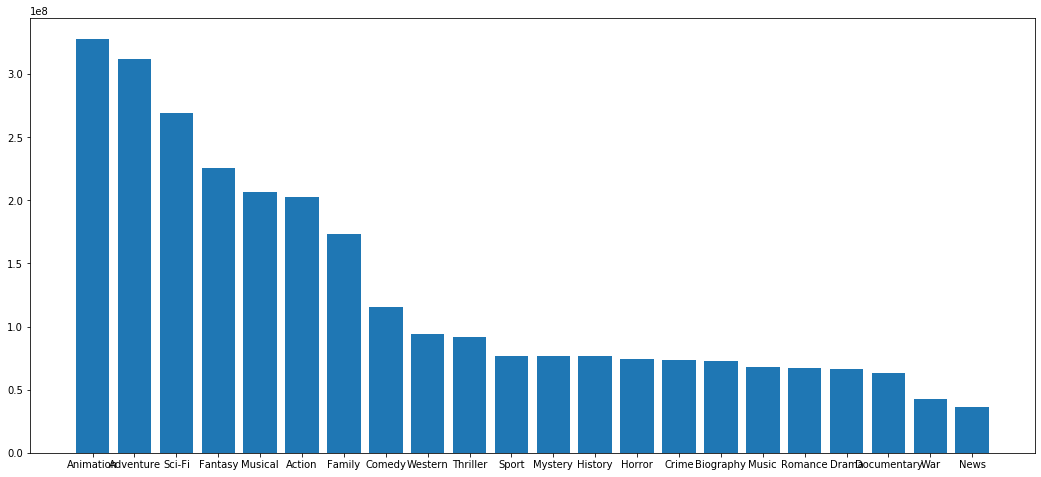

In [182]:
plt.figure(figsize = (18,8))
plt.bar(df_genre_rev['genre'],df_genre_rev['revenue'])

<BarContainer object of 22 artists>

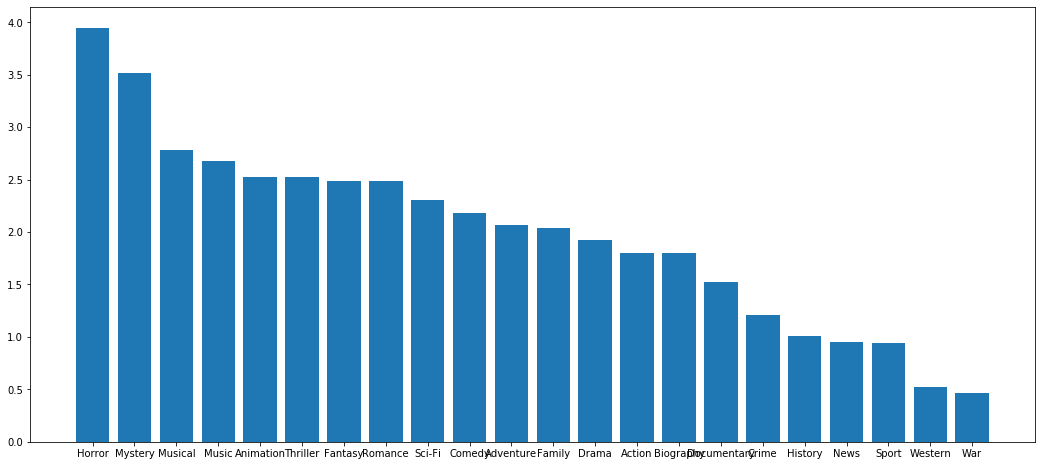

In [183]:
plt.figure(figsize = (18,8))
plt.bar(df_genre_profit['genre'],df_genre_profit['profit'])

<BarContainer object of 22 artists>

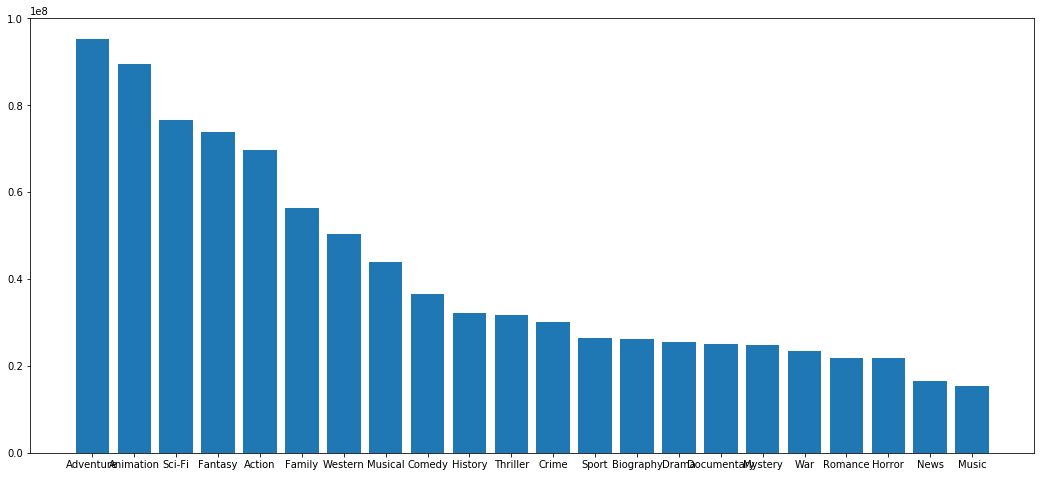

In [199]:
plt.figure(figsize = (18,8))
plt.bar(df_genre_budget['genre'],df_genre_budget['budget'])

In [200]:
df_genre_budget

,revenue,profit,budget,genre
2,3.121947e+08,2.064192,9.534620e+07,Adventure
7,3.281689e+08,2.521463,8.947422e+07,Animation
4,2.690445e+08,2.301611,7.663659e+07,Sci-Fi
3,2.253270e+08,2.489912,7.384850e+07,Fantasy
1,2.030269e+08,1.796750,6.972328e+07,Action
9,1.734268e+08,2.039823,5.636955e+07,Family
6,9.381950e+07,0.518488,5.041429e+07,Western
12,2.068257e+08,2.784281,4.386429e+07,Musical
8,1.151357e+08,2.181057,3.645874e+07,Comedy
17,7.646640e+07,1.012974,3.218028e+07,History
